In [1]:
import pandas as pd

In [5]:
df = pd.read_csv("Cricket (3).csv",encoding= 'latin1')

In [6]:
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [7]:
df.shape

(79, 13)

In [8]:
df.isnull().sum()

Player    0
Span      0
Mat       0
Inns      0
NO        0
Runs      0
HS        0
Ave       0
BF        0
SR        0
100       0
50        0
0         0
dtype: int64

In [10]:
df[['Strt','End']] = df.Span.str.split("-",expand=True)

In [11]:
df

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Strt,End
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,1989,2012
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,2000,2015
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1995,2012
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1989,2011
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,1998,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),1975-1991,128,127,13,5134,133*,45.03,7908,64.92,11,31,3,1975,1991
75,Misbah-ul-Haq (PAK),2002-2015,162,149,31,5122,96*,43.40,6945,73.75,0,42,6,2002,2015
76,PD Collingwood (ENG),2001-2011,197,181,37,5092,120*,35.36,6614,76.98,5,26,7,2001,2011
77,A Symonds (AUS),1998-2009,198,161,33,5088,156,39.75,5504,92.44,6,30,15,1998,2009


In [12]:
df[['Strt','End']] = df[['Strt','End']].astype(int)

In [14]:
df['Exp'] = df['End']-df['Strt']

In [15]:
df.drop(['Strt','Span','End'],axis=1,inplace=True)

In [16]:
df.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,SR Tendulkar (INDIA),463,452,41,18426,200*,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17


<AxesSubplot:>

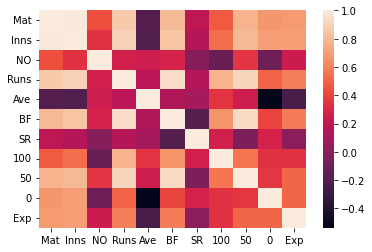

In [17]:
import seaborn as sns 
sns.heatmap(df.corr())

In [18]:
player = df.pop('Player')

In [19]:
df.head()

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,23
1,404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,448,418,39,12650,144,33.37,16020,78.96,19,77,28,17


In [20]:
player


0            SR Tendulkar (INDIA)
1     KC Sangakkara (Asia/ICC/SL)
2            RT Ponting (AUS/ICC)
3         ST Jayasuriya (Asia/SL)
4      DPMD Jayawardene (Asia/SL)
                 ...             
74              CG Greenidge (WI)
75            Misbah-ul-Haq (PAK)
76           PD Collingwood (ENG)
77                A Symonds (AUS)
78        Abdul Razzaq (Asia/PAK)
Name: Player, Length: 79, dtype: object

In [22]:
import sklearn
from sklearn.preprocessing import StandardScaler

In [26]:
df['HS'] = df.HS.str.replace('*','')
df.head()

C:\Users\AKASH\AppData\Local\Temp\ipykernel_6032\1274902450.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['HS'] = df.HS.str.replace('*','')


,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,463,452,41,18426,200,44.83,21367,86.23,49,96,20,23
1,404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,448,418,39,12650,144,33.37,16020,78.96,19,77,28,17


In [27]:
sca = StandardScaler()
df_scaled = sca.fit_transform(df)
df_scaled

array([[ 2.95528204e+00,  3.16933340e+00,  7.64962749e-01,
         4.26232808e+00,  1.63244320e+00,  1.07229395e+00,
         3.68121424e+00,  7.03151526e-01,  4.65672622e+00,
         3.05005720e+00,  1.14583653e+00,  2.81278702e+00],
       [ 2.15517925e+00,  2.13891509e+00,  7.64962749e-01,
         2.60911662e+00,  6.35223595e-01,  5.87724608e-01,
         2.63538469e+00, -4.41394951e-02,  1.67188751e+00,
         2.86541772e+00,  2.96670622e-01,  3.80938324e-01],
       [ 1.76190839e+00,  1.92424461e+00,  6.25396797e-01,
         2.40009894e+00,  4.74381724e-01,  5.96225824e-01,
         2.31965067e+00,  1.10996904e-01,  2.29372891e+00,
         2.18840630e+00,  1.14583653e+00,  9.88900497e-01],
       [ 2.71118288e+00,  2.89741746e+00, -8.40045698e-01,
         2.29204075e+00,  1.27859108e+00, -1.04790945e+00,
         1.58829472e+00,  1.20709133e+00,  2.04499235e+00,
         1.32675540e+00,  3.52350108e+00,  2.50880593e+00],
       [ 2.75186607e+00,  2.68274698e+00,  6.2539679

In [28]:
df.columns

Index(['Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR', '100', '50', '0',
       'Exp'],
      dtype='object')

In [30]:
df1 = pd.DataFrame(df_scaled,columns=['Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR', '100', '50', '0',
       'Exp'])

In [31]:
df1.head()

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,2.955282,3.169333,0.764963,4.262328,1.632443,1.072294,3.681214,0.703152,4.656726,3.050057,1.145837,2.812787
1,2.155179,2.138915,0.764963,2.609117,0.635224,0.587725,2.635385,-0.044139,1.671888,2.865418,0.296671,0.380938
2,1.761908,1.924245,0.625397,2.400099,0.474382,0.596226,2.319651,0.110997,2.293729,2.188406,1.145837,0.988900
3,2.711183,2.897417,-0.840046,2.292041,1.278591,-1.047909,1.588295,1.207091,2.044992,1.326755,3.523501,2.508806
4,2.751866,2.682747,0.625397,1.984430,-0.168986,-0.876185,1.996354,-0.034000,0.925678,1.880674,2.504502,0.988900


In [36]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

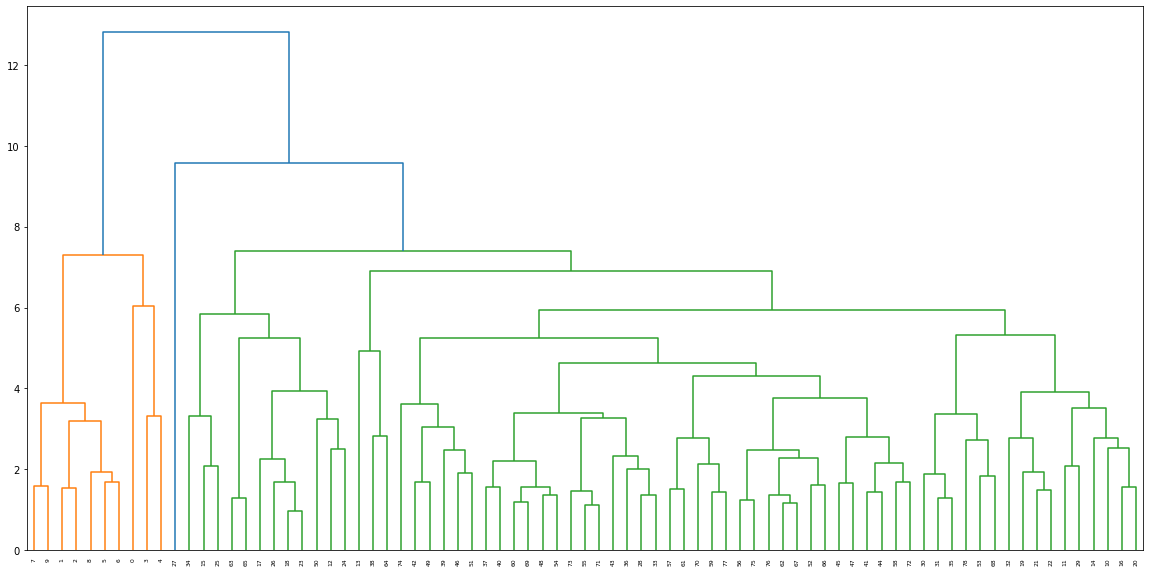

In [38]:
plt.figure(figsize=(20,10))
merge = linkage(df1,method='complete')
dendrogram(merge)
plt.show()

In [39]:
from scipy.cluster.hierarchy import cut_tree

In [42]:
cut_tree(merge,n_clusters=3)

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

In [43]:
cluster_labels = cut_tree(merge,n_clusters=3).reshape(-1,)
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [45]:
df['players'] = player
df_hc = df.copy()

In [47]:
df_hc['Cluster_Labels']  = cluster_labels
df_hc.head()

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,players,Cluster_Labels
0,463,452,41,18426,200,44.83,21367,86.23,49,96,20,23,SR Tendulkar (INDIA),0
1,404,380,41,14234,169,41.98,18048,78.86,25,93,15,15,KC Sangakkara (Asia/ICC/SL),0
2,375,365,39,13704,164,42.03,17046,80.39,30,82,20,17,RT Ponting (AUS/ICC),0
3,445,433,18,13430,189,32.36,14725,91.20,28,68,34,22,ST Jayasuriya (Asia/SL),0
4,448,418,39,12650,144,33.37,16020,78.96,19,77,28,17,DPMD Jayawardene (Asia/SL),0


<AxesSubplot:xlabel='Inns', ylabel='Runs'>

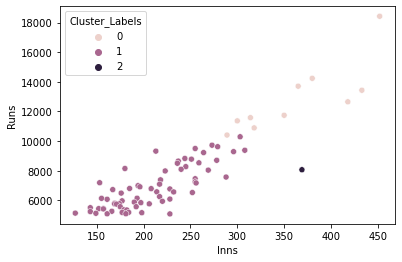

In [50]:
sns.scatterplot(x='Inns',y='Runs',hue='Cluster_Labels',data=df_hc)

<AxesSubplot:xlabel='Mat', ylabel='100'>

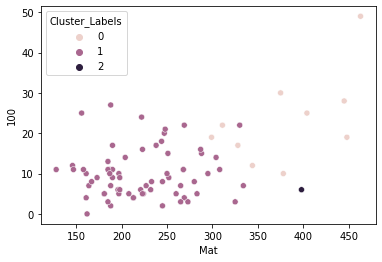

In [52]:
sns.scatterplot(x='Mat',y='100',hue='Cluster_Labels',data=df_hc)

<AxesSubplot:xlabel='Mat', ylabel='SR'>

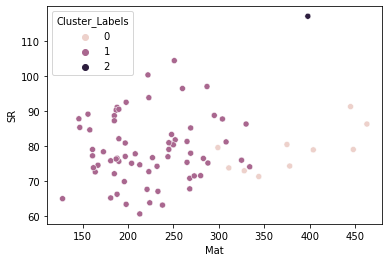

In [53]:
sns.scatterplot(x='Mat',y='SR',hue='Cluster_Labels',data=df_hc)